<a href="https://colab.research.google.com/github/Ravi-attada/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k Means Clustering


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Load image
image = io.imread('https://i.pinimg.com/736x/5a/43/d0/5a43d091fa63eac59a311102fd2c260a.jpg')
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = image.reshape(-1, 3)

# Apply KMeans clustering
k = 20  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # ✅ FIXED
kmeans.fit(pixels)

# Get segmented image
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(np.uint8)

# Display segmented image
plt.imshow(segmented_img)
plt.title(f'Segmented Image with {k} colors')
plt.axis('off')
plt.show()

kmeans clustering with elbow method


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io
image = io.imread('https://i.pinimg.com/736x/5a/43/d0/5a43d091fa63eac59a311102fd2c260a.jpg')
pixels = image.reshape(-1, 3)
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(pixels)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

k_opt = 20
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
kmeans.fit(pixels)
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(segmented_img)
plt.title(f"Segmented Image (K={k_opt})")
plt.axis('off')
plt.show()


classification techniques


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
              n_redundant=5, n_classes=3, weights=[0.5, 0.3, 0.2],
              class_sep=1.5, flip_y=0.01, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale features for models sensitive to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_train_scaled, y_train)
print("Logistic Regression Accuracy:", lr.score(X_test_scaled, y_test))

# Decision Tree
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)
print("Decision Tree Accuracy:", tree.score(X_test, y_test))

# SVM with different kernels
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_scaled, y_train)
print("Linear SVM Accuracy:", svc_linear.score(X_test_scaled, y_test))

svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X_train_scaled, y_train)
print("Polynomial SVM Accuracy:", svc_poly.score(X_test_scaled, y_test))

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train_scaled, y_train)
print("RBF SVM Accuracy:", svc_rbf.score(X_test_scaled, y_test))

classification techniques with dataset


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale features for models sensitive to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_train_scaled, y_train)
print("Logistic Regression Accuracy:", lr.score(X_test_scaled, y_test))

# Decision Tree
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)
print("Decision Tree Accuracy:", tree.score(X_test, y_test))

# SVM with different kernels
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_scaled, y_train)
print("Linear SVM Accuracy:", svc_linear.score(X_test_scaled, y_test))

svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X_train_scaled, y_train)
print("Polynomial SVM Accuracy:", svc_poly.score(X_test_scaled, y_test))

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train_scaled, y_train)
print("RBF SVM Accuracy:", svc_rbf.score(X_test_scaled, y_test))


Save all the three models, hyperparameters as .joblib file in your Google drive.

In [ ]:
# --- 1. Install & import packages
!pip install joblib
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import joblib
from google.colab import drive
import os

# --- 2. Mount Google Drive
drive.mount('/content/drive')

# Choose a folder in your Drive to save the models
save_dir = '/content/drive/MyDrive/sklearn_models'
os.makedirs(save_dir, exist_ok=True)

# --- 3. Create and split dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    n_classes=3, weights=[0.5, 0.3, 0.2], class_sep=1.5,
    flip_y=0.01, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# --- 4. Scale for models that need scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# --- 5. Train models
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_train_scaled, y_train)

tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_scaled, y_train)

svc_poly = SVC(kernel='poly', degree=3)
svc_poly.fit(X_train_scaled, y_train)

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train_scaled, y_train)

# --- 6. Save each model + hyperparameters to Google Drive
models_to_save = {
    'logistic_regression.joblib': (lr, lr.get_params()),
    'decision_tree.joblib':       (tree, tree.get_params()),
    'svc_linear.joblib':          (svc_linear, svc_linear.get_params()),
    'svc_poly.joblib':            (svc_poly, svc_poly.get_params()),
    'svc_rbf.joblib':             (svc_rbf, svc_rbf.get_params())
}

for filename, (model, params) in models_to_save.items():
    payload = {
        'model': model,
        'hyperparameters': params,
        'test_accuracy': model.score(
            X_test_scaled if "svc" in filename or "logistic" in filename
            else X_test,
            y_test
        )
    }
    joblib.dump(payload, os.path.join(save_dir, filename))

print(f"Saved {len(models_to_save)} .joblib files to:", save_dir)

classifier metrics


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression
Accuracy: 0.777
Precision (macro): 0.709
Recall (macro): 0.631
F1-score (macro): 0.653
ROC-AUC (macro): 0.883
PR-AUC (macro): 0.721

Decision Tree
Accuracy: 0.795
Precision (macro): 0.733
Recall (macro): 0.696
F1-score (macro): 0.711
ROC-AUC (macro): 0.787
PR-AUC (macro): 0.619

SVM
Accuracy: 0.900
Precision (macro): 0.917
Recall (macro): 0.785
F1-score (macro): 0.827
ROC-AUC (macro): 0.965
PR-AUC (macro): 0.920


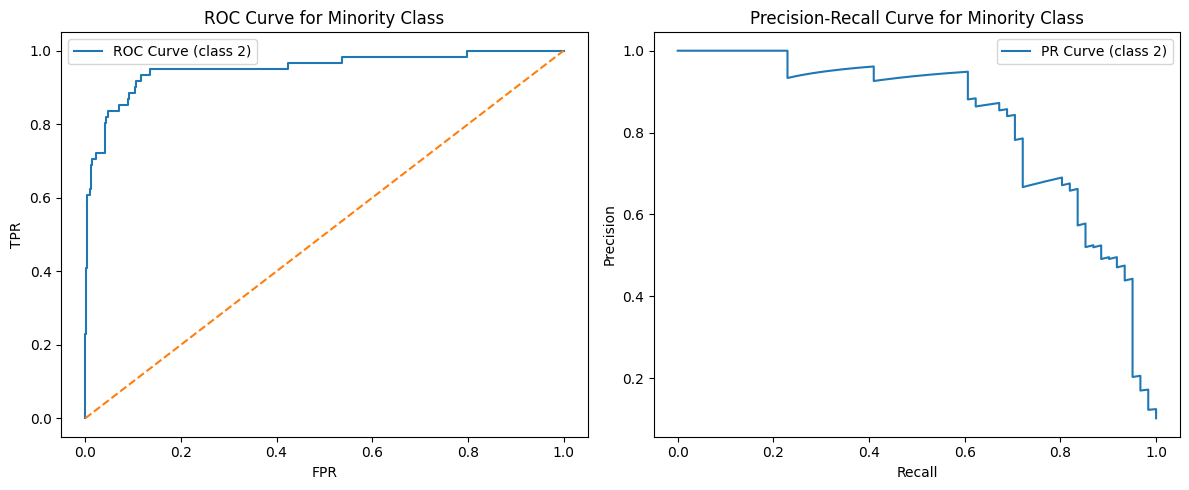

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
)

# Dataset
X, y = make_classification(
    n_samples=3000, n_features=50, n_informative=15, n_redundant=10,
    n_classes=3, weights=[0.6, 0.3, 0.1], flip_y=0.02, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=2000, multi_class='multinomial'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

# Evaluation
for name, clf in classifiers.items():
    if name in ["Logistic Regression", "SVM"]:  # scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        y_proba = clf.predict_proba(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    y_bin = label_binarize(y_test, classes=[0,1,2])
    roc_auc = roc_auc_score(y_bin, y_proba, average='macro', multi_class='ovr')
    pr_auc = average_precision_score(y_bin, y_proba, average='macro')

    print(f"\n{name}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision (macro): {prec:.3f}")
    print(f"Recall (macro): {rec:.3f}")
    print(f"F1-score (macro): {f1:.3f}")
    print(f"ROC-AUC (macro): {roc_auc:.3f}")
    print(f"PR-AUC (macro): {pr_auc:.3f}")

# ROC & PR for minority class (class 2) with SVM
y_bin = label_binarize(y_test, classes=[0,1,2])
clf = SVC(kernel='rbf', probability=True)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
clf.fit(X_train_scaled, y_train)
y_proba = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_bin[:,2], y_proba[:,2])
prec, rec, _ = precision_recall_curve(y_bin[:,2], y_proba[:,2])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label='ROC Curve (class 2)')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Minority Class')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rec, prec, label='PR Curve (class 2)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Minority Class')
plt.legend()
plt.tight_layout()
plt.show()

classifier metrics curves for logistic and decision tree


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


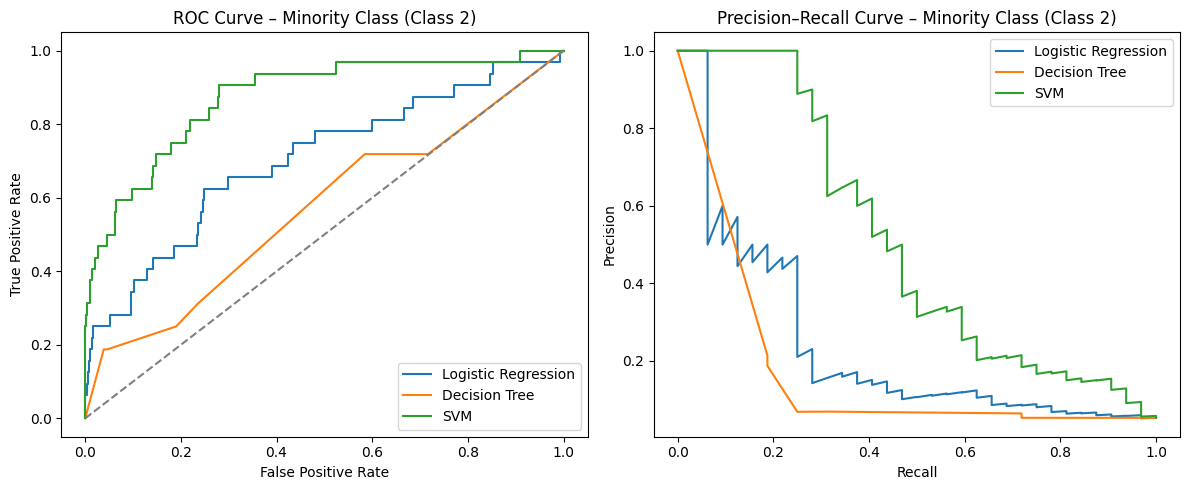

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, precision_recall_curve

# Dataset with higher imbalance
X, y = make_classification(
    n_samples=3000, n_features=50, n_informative=15, n_redundant=10,
    n_classes=3, weights=[0.8, 0.15, 0.05], flip_y=0.02, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=0
)

# Classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, multi_class='multinomial'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = {}

# Train and collect ROC & PR data for minority class (class 2)
for name, clf in models.items():
    if name in ["Logistic Regression", "SVM"]:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf.fit(X_train_scaled, y_train)
        y_proba = clf.predict_proba(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_proba = clf.predict_proba(X_test)

    y_bin = label_binarize(y_test, classes=[0, 1, 2])
    fpr, tpr, _ = roc_curve(y_bin[:, 2], y_proba[:, 2])
    prec, rec, _ = precision_recall_curve(y_bin[:, 2], y_proba[:, 2])
    results[name] = (fpr, tpr, prec, rec)

# Plot ROC curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for name, (fpr, tpr, _, _) in results.items():
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Minority Class (Class 2)")
plt.legend()

# Plot PR curves
plt.subplot(1,2,2)
for name, (_, _, prec, rec) in results.items():
    plt.plot(rec, prec, label=name)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Minority Class (Class 2)")
plt.legend()

plt.tight_layout()
plt.show()

pca and kernal pca


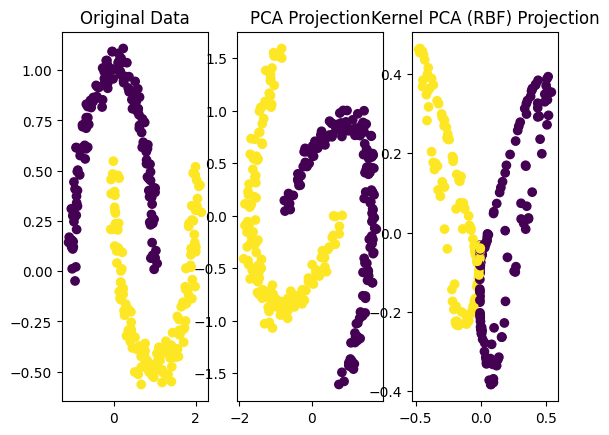

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
# Generate synthetic non-linear dataset (two moons)
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_scaled)
# Plot Original Data
plt.subplot(1, 3, 1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Original Data")
# Plot PCA
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.title("PCA Projection")
# Plot Kernel PCA
plt.subplot(1, 3, 3)
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, cmap='viridis')
plt.title("Kernel PCA (RBF) Projection")
plt.show()

taking dataset and constructing pca ad kernal pca graphs


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/diabetes.csv")
no_of_featueres = df.shape[1]
X = df.iloc[:, :-1]
y = df.iloc[:, [-1]]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
from sklearn.metrics import mean_squared_error
mse_list=[]

for n in range(1, no_of_featueres):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = mean_squared_error(X, X_reconstructed)
    mse_list.append(mse)
plt.plot(range(1, no_of_featueres), mse_list, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction MSE")
plt.title("PCA : MSE vs Number of PCs")
plt.grid(True)
plt.show()
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse_list = []

for n in range(1, no_of_featueres + 1):
    kpca = KernelPCA(n_components=n, kernel="rbf", gamma=0.01, fit_inverse_transform=True)
    X_kpca = kpca.fit_transform(X_scaled)
    X_kpca_reconstructed = kpca.inverse_transform(X_kpca)
    mse = mean_squared_error(X_scaled, X_kpca_reconstructed)
    mse_list.append(mse)

plt.plot(range(1, no_of_featueres + 1), mse_list, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction MSE")
plt.title("Kernel PCA: MSE vs Number of PCs")
plt.grid(True)
plt.show()
